In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
import pandas as pd

file_path = '/content/drive/MyDrive/FrontrunnningData/insertion_attacks.csv'
# List to store data from CSV
df = pd.read_csv(file_path)


In [ ]:
df.head()

,blockHash,blockNumber,hash,input,from,to,value,gasPrice,gas,nonce,chainId,type,r,s,v,Label
0,0xba778a962b8c4af8ff7dda6d4069f95040beb75f7aa5...,7393100,0x069067d9d81ec64edd5be7e9119b67848c4b167f2b6b...,0x,0x5BCbdfB6cc624b959c39A2D16110D1f2D9204F72,0xa9374759986bF97B03E40F22e62b62A76A073181,3.420000e+19,6.300000e+10,300000,19802,1.0,0,0x56dcd5cc7cffe09862e084c0460c371a93eaf1738b45...,0x0b1eb46bd3335d7489f000fd15a5c689e7590f331f86...,37,Not Attack
1,0xba778a962b8c4af8ff7dda6d4069f95040beb75f7aa5...,7393100,0x47d7e24c0c73e7088d572f596ebc64952957a6cb5ba5...,0xf39b5b9b000000000000000000000000000000000000...,0x54bc3fE4E8C377246aCd5b4c25705c1b4324e859,0x87d80DBD37E551F58680B4217b23aF6a752DA83F,6.190000e+17,5.510006e+10,200000,1010,NaN,0,0x2c07c54387808e6b3039a38c4c16b7ccc770aaff8307...,0x23b386836d342b31c33cae42b7390e5eb7814675b41d...,27,Attack
2,0xba778a962b8c4af8ff7dda6d4069f95040beb75f7aa5...,7393100,0x446b9a8439c283372ce48714c4b862edc71cacd9d8f0...,0xf39b5b9b000000000000000000000000000000000000...,0xF71B07E4E52D5218bEFBFD1aD8B388fbc035a0Bd,0x87d80DBD37E551F58680B4217b23aF6a752DA83F,2.330000e+18,5.510006e+10,250000,876,NaN,0,0xd5e240af74c4bf620efcb06673fc7edd30051f676607...,0x4c644e8c34bd00169be217e571ba7b9ba99a31b80416...,27,Not Attack
3,0xba778a962b8c4af8ff7dda6d4069f95040beb75f7aa5...,7393100,0x59bee57c6b5d449af08bd47e211225bb98810364719d...,0x95e3c50b000000000000000000000000000000000000...,0x54bc3fE4E8C377246aCd5b4c25705c1b4324e859,0x87d80DBD37E551F58680B4217b23aF6a752DA83F,0.000000e+00,5.510006e+10,200000,1011,NaN,0,0xa0b281972b0509106fa4c16f147487455e13b07f9968...,0x58be9cd93ad0fb5922b19ebecc80870fb4a8a5c7d8bf...,27,Attack
4,0xba778a962b8c4af8ff7dda6d4069f95040beb75f7aa5...,7393100,0x8e4ebfdb7081b9d07565461afd969076b12262be284e...,0x0f2c9329000000000000000000000000fbb1b73c4f0b...,0xe09a5909324a060A269Adc80C408DCFDd8111a59,0xE94b04a0FeD112f3664e45adb2B8915693dD5FF3,9.870000e+16,5.000000e+10,150000,428,1.0,0,0x2ad21f7afaac0e5de5717ff602dc5750a54591f12249...,0x35afd505dff6dc2a8adea9b9bee4365261ed9e4d0858...,37,Not Attack


In [ ]:
df['Label'].value_counts()

Label
Not Attack    393971
Attack          9416
Name: count, dtype: int64

In [ ]:
data_list = df.to_dict(orient='records')

In [ ]:
print(type(data_list[0]['gasPrice']))

<class 'float'>


In [ ]:
def prepare_sequences(transactions_data):
    sequences = []
    sequence = []
    for i in range(14):

      gas_price_str = transactions_data[i]
      gas_price_float = float(gas_price_str)
      sequence.append(gas_price_float)
      seq = []
      for j in range(14 - i - 1):
        gas_price_str = transactions_data[0]
        gas_price_float = float(gas_price_str)
        seq.append(gas_price_float)
      seq.extend(sequence)
      sequences.append(seq)
    for i in range(len(transactions_data) - 14):  # For each transaction, take the last 15 transactions
        sequence = []
        for j in range(14):
            # print(transactions_data[i + j]['gas_price'])
            gas_price_str = transactions_data[i + j]
            gas_price_float = float(gas_price_str)
            sequence.append(gas_price_float)
        sequences.append(sequence)
    return sequences

In [ ]:
# Standard Scaling the Gas Prices
import numpy as np
gas_prices = []
sum = 0
cnt = 0
for row in data_list:
  gas_prices.append(row['gasPrice'])
  sum = sum + row['gasPrice']
  cnt = cnt + 1
  if np.isnan(row['gasPrice']) :
    # print(row['gasPrice'])
    print(cnt)
    # break
# print(sum)
mean = np.mean(gas_prices)
std_dev = np.std(gas_prices)
print("Mean:", mean)
print("Std Dev:", std_dev)

print(gas_prices[0])
for i in range(len(gas_prices)):
  gas_prices[i] = (gas_prices[i] - mean) / std_dev
print(gas_prices[0])

Mean: 15063282638.477222
Std Dev: 31245143877.22971
63000000000.0
1.534213366079497


In [ ]:
import pickle

with open('/content/drive/MyDrive/FrontrunnningData/lstm_model.pkl', 'rb') as file:
    # Serialize and save the model to the file
    lstm_model = pickle.load(file)

In [ ]:
sequences = prepare_sequences(gas_prices)
print(len(sequences))
print(len(data_list))
sequences_scaled = np.array(sequences)

X = np.reshape(sequences_scaled[:, ], (sequences_scaled.shape[0], sequences_scaled.shape[1], 1))

403387
403387


In [ ]:
def inv_transform(y_pred):
  y = y_pred.copy()
  for i in range(len(y)):
    y[i] = (y[i]*std_dev) + mean
  return y


y_pred = lstm_model.predict(X)
y_pred_inv = inv_transform(y_pred)

12606/12606 [==============================] - 70s 5ms/step


In [ ]:
def calculate_mean_gas_price_by_eoa(transactions_data):
    eoa_gas_prices = {}  # Dictionary to store gas prices for each EOA
    eoa_transaction_counts = {}  # Dictionary to store transaction counts for each EOA

    # Iterate through transactions data
    for transaction in transactions_data:
        sender_eoa = transaction['from']
        gas_price = transaction['gasPrice']
        gas_price = float(gas_price)
        # Update gas prices for the sender's EOA
        if sender_eoa in eoa_gas_prices:
            eoa_gas_prices[sender_eoa].append(gas_price)
            eoa_transaction_counts[sender_eoa] += 1
        else:
            eoa_gas_prices[sender_eoa] = [gas_price]
            eoa_transaction_counts[sender_eoa] = 1

    # Calculate mean gas price for each EOA
    mean_gas_price_by_eoa = {}
    std_dev_gas_price_by_eoa = {}

    for eoa, gas_prices in eoa_gas_prices.items():
        mean_gas_price_by_eoa[eoa] = np.mean(gas_prices)
        std_dev_gas_price_by_eoa[eoa] = np.std(gas_prices)

    return mean_gas_price_by_eoa, std_dev_gas_price_by_eoa


# Calculate mean gas price by EOA
mean_gas_price_by_eoa, std_dev_gas_price_by_eoa = calculate_mean_gas_price_by_eoa(data_list)

# Print mean gas price by EOA
# for eoa, mean_gas_price in mean_gas_price_by_eoa.items():
#     print(f"EOA: {eoa}, Mean Gas Price: {mean_gas_price}")


In [ ]:
# Calculate mean gas price and std deviation of gas price per block
def calculate_stats_gas_price_by_block(transactions_data):
    block_gas_prices = {}  # Dictionary to store gas prices for each block
    block_transaction_counts = {}  # Dictionary to store transaction counts for each block

    # Iterate through transactions data
    for transaction in transactions_data:
        blockNumber = transaction['blockNumber']
        gas_price = transaction['gasPrice']
        gas_price = float(gas_price)

        if blockNumber in block_gas_prices:
            block_gas_prices[blockNumber].append(gas_price)
            block_transaction_counts[blockNumber] += 1
        else:
            block_gas_prices[blockNumber] = [gas_price]
            block_transaction_counts[blockNumber] = 1

    # Calculate mean gas price for each block
    mean_gas_price_by_block = {}
    std_dev_gas_price_by_block = {}

    for block, gas_prices in block_gas_prices.items():
        mean_gas_price_by_block[block] = np.mean(gas_prices)
        std_dev_gas_price_by_block[block] = np.std(gas_prices)

    return mean_gas_price_by_block, std_dev_gas_price_by_block


# Calculate mean gas price by block
mean_gas_price_by_block, std_dev_gas_price_by_block = calculate_stats_gas_price_by_block(data_list)

# Print mean gas price by EOA
# for eoa, mean_gas_price in mean_gas_price_by_eoa.items():
#     print(f"EOA: {eoa}, Mean Gas Price: {mean_gas_price}")


In [ ]:
# Process data and calculate features
def extract_features(transactions_data, y):
    feature_vectors = []
    cnt = 0
    for transaction in transactions_data:
        # print(transaction.blockNumber)
        feature_vector = []
        # 1. Gas Price of the Transaction
        gas_price = transaction['gasPrice']
        feature_vector.append(gas_price)
        # 2. Predicted Gas Price
        feature_vector.append(y[cnt][0])
        cnt =  cnt + 1
        # 3. Mean Gas Price of Transactions by the same EOA
        mean_by_eoa = mean_gas_price_by_eoa[transaction['from']]
        # print(mean_by_eoa)
        feature_vector.append(mean_by_eoa)
        # 4. Standard Deviation of Gas Price in Transactions by the same EOA
        std_dev_by_eoa = std_dev_gas_price_by_eoa[transaction['from']]
        feature_vector.append(std_dev_by_eoa)
        # 5. Mean Gas Price of Transactions by the same block
        mean_by_block = mean_gas_price_by_block[transaction['blockNumber']]
        feature_vector.append(mean_by_block)
        # 6. Standard Deviation of Gas Price in Transactions by the same EOA
        std_dev_by_block = std_dev_gas_price_by_block[transaction['blockNumber']]
        feature_vector.append(std_dev_by_block)
        # feature_vector.append(transaction['Label'])
        feature_vectors.append(feature_vector)
    # df = pd.DataFrame(feature_vectors, columns = ['gas_price', 'pred_gas_price', 'mean_by_eoa', 'std_dev_by_eoa', 'mean_by_block', 'std_dev_by_block', 'Label'])
    return feature_vectors

feature_vectors = extract_features(data_list, y_pred_inv)
# feature_vectors_test = extract_features(data_list_test, y_pred)

In [ ]:
print(type(feature_vectors))

<class 'list'>


In [ ]:
feature_vectors['Label'].value_counts()

TypeError: list indices must be integers or slices, not str

In [ ]:
feature_vectors.head()

,gas_price,pred_gas_price,mean_by_eoa,std_dev_by_eoa,mean_by_block,std_dev_by_block,Label
0,6.300000e+10,3.328677e+10,7.645113e+10,3.221296e+10,1.084492e+10,1.356278e+10,Not Attack
1,5.510006e+10,3.308217e+10,1.533545e+10,2.518084e+10,1.084492e+10,1.356278e+10,Attack
2,5.510006e+10,3.133907e+10,9.177503e+10,4.414010e+10,1.084492e+10,1.356278e+10,Not Attack
3,5.510006e+10,3.149473e+10,1.533545e+10,2.518084e+10,1.084492e+10,1.356278e+10,Attack
4,5.000000e+10,3.058867e+10,5.000000e+10,0.000000e+00,1.084492e+10,1.356278e+10,Not Attack


In [ ]:
feature_vectors.to_csv('/content/drive/MyDrive/FrontrunnningData/feature_vectors.csv')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Sample feature vectors and labels
# Assuming 'data_list' and 'feature_vectors' are defined elsewhere
labels = ['Attack' if label['Label'] == 'Attack' else 'Not Attack' for label in data_list]
# Convert lists to numpy arrays
X = np.array(feature_vectors, dtype=np.float32)
y = np.array(labels)
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X = scaler.fit_transform(X)
# Convert labels to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Calculate the index to split the data
split_index = int(0.8 * len(X))

# Split the data into training and testing sets
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y_encoded[:split_index], y_encoded[split_index:]

Epoch [10/50], Train Loss: 0.6725, Test Loss: 0.6544, Train Accuracy: 0.4719, Test Accuracy: 0.5152
Epoch [20/50], Train Loss: 0.6333, Test Loss: 0.6156, Train Accuracy: 0.6222, Test Accuracy: 0.7225
Epoch [30/50], Train Loss: 0.5968, Test Loss: 0.5791, Train Accuracy: 0.7633, Test Accuracy: 0.8612
Epoch [40/50], Train Loss: 0.5626, Test Loss: 0.5447, Train Accuracy: 0.8612, Test Accuracy: 0.9222
Epoch [50/50], Train Loss: 0.5304, Test Loss: 0.5124, Train Accuracy: 0.9243, Test Accuracy: 0.9544


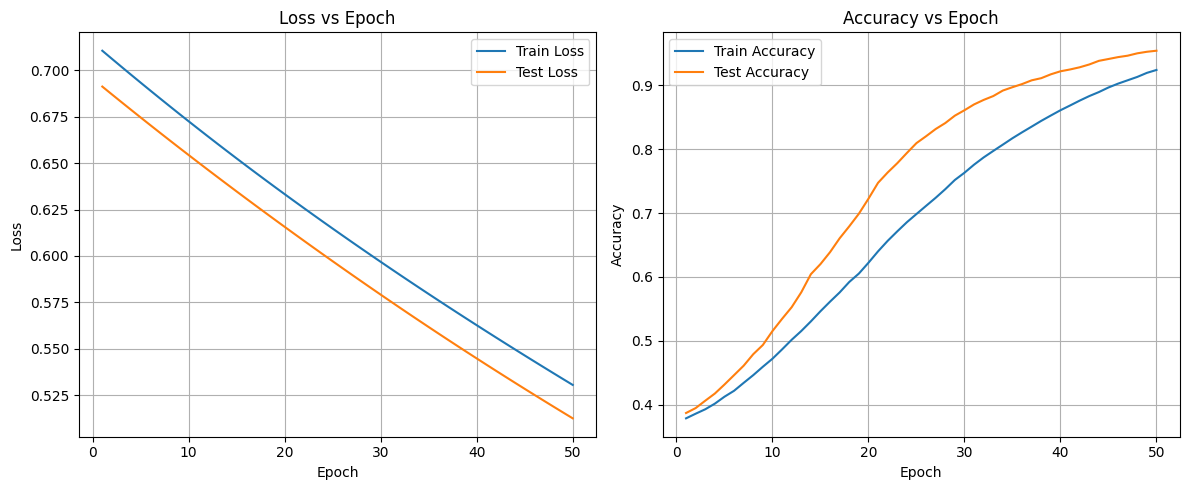

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Define custom MLP classifier model
class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Sample feature vectors and labels
# Assuming 'data_list' and 'feature_vectors' are defined elsewhere
labels = ['Attack' if label['Label'] == 'Attack' else 'Not Attack' for label in data_list]
# Set seed for PyTorch
torch.manual_seed(78)
np.random.seed(42)
# Convert lists to numpy arrays
X = np.array(feature_vectors, dtype=np.float32)
y = np.array(labels)
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X = scaler.fit_transform(X)
# Convert labels to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Calculate the index to split the data
split_index = int(0.8 * len(X))

# Split the data into training and testing sets
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y_encoded[:split_index], y_encoded[split_index:]

# Hyperparameters
input_size = X_train.shape[1]  # Number of features
hidden_size = 10  # Number of neurons in hidden layer
num_classes = len(np.unique(y))  # Number of output classes
learning_rate = 0.001
num_epochs = 50

# Initialize the model
model = MLPClassifier(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
y_pred = []

for epoch in range(num_epochs):
    # Convert numpy arrays to PyTorch tensors
    inputs = torch.tensor(X_train)
    targets = torch.tensor(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Track train loss
    train_losses.append(loss.item())

    # Calculate accuracy on training set
    with torch.no_grad():
        train_pred = torch.argmax(outputs, axis=1)
        train_acc = torch.sum(train_pred == targets).item() / len(targets)
        train_accuracies.append(train_acc)

        # Calculate test loss
        inputs_test = torch.tensor(X_test)
        targets_test = torch.tensor(y_test)
        outputs_test = model(inputs_test)
        loss_test = criterion(outputs_test, targets_test)
        test_losses.append(loss_test.item())

        # Calculate accuracy on test set
        test_pred = torch.argmax(outputs_test, axis=1)
        y_pred = test_pred
        test_acc = torch.sum(test_pred == targets_test).item() / len(targets_test)
        test_accuracies.append(test_acc)

    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

# Plot Loss and Accuracy vs Epoch
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler, LabelEncoder

# Sample feature vectors and labels
# Assuming 'data_list' and 'feature_vectors' are defined elsewhere
labels = ['Attack' if label['Label'] == 'Attack' else 'Not Attack' for label in data_list]

# Convert lists to numpy arrays
X = np.array(feature_vectors, dtype=np.float32)
y = np.array(labels)
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X = scaler.fit_transform(X)
# Convert labels to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Calculate the index to split the data
split_index = int(0.8 * len(X))

# Split the data into training and testing sets
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y_encoded[:split_index], y_encoded[split_index:]



# Create an MLP classifier with 2 hidden layers, each having 10 neurons
mlp_classifier = MLPClassifier(hidden_layer_sizes=(10, 10), activation='logistic', solver='adam', random_state=1)
# Initialize lists to store training and testing accuracies at each epoch
train_accuracies = []
test_accuracies = []

# Train the classifier for each epoch and record the accuracies
for epoch in range(1, 51):  # Training for 100 epochs
    # Train the classifier on the training data
    mlp_classifier.partial_fit(X_train, y_train, classes=np.unique(y_train))

    # Calculate training accuracy
    y_train_pred = mlp_classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Calculate testing accuracy
    y_test_pred = mlp_classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)


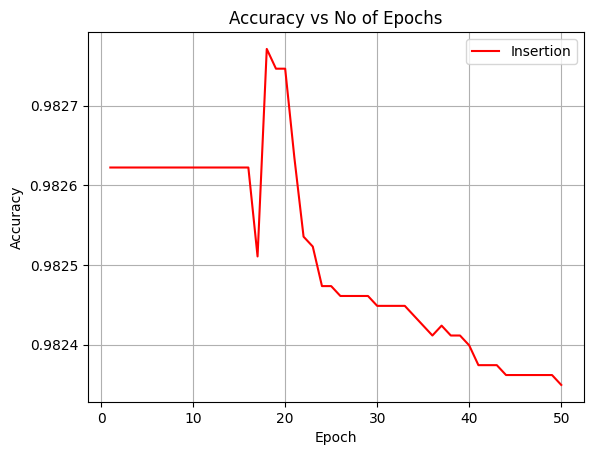

In [ ]:

# Plot Accuracy vs No of epochs
# plt.plot(range(1, 51), train_accuracies, label='Insertion', color='red')
plt.plot(range(1, 51), test_accuracies, label='Insertion', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs No of Epochs')
plt.legend()
plt.grid(True)
plt.savefig('/content/insMLP.png')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision score
precision = precision_score(y_test, y_pred, pos_label=0)

# Calculate recall score
recall = recall_score(y_test, y_pred, pos_label=0)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, pos_label=0)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# # Calculate ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, mlp_classifier.predict_proba(X_test)[:,1])

# # Calculate AUC
# auc_score = auc(fpr, tpr)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)
# print("AUC Score:", auc_score)

# Plot ROC curve
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()


Accuracy: 0.9544113636927043
Precision: 0.011587982832618025
Recall: 0.01925820256776034
F1 Score: 0.014469453376205785
Confusion Matrix:
 [[   27  1375]
 [ 2303 76973]]


In [ ]:
print("Train Counts:")
counts = np.bincount(y_train)
print("Count of 0's:", counts[0])
print("Count of 1's:", counts[1])
print("Test Counts:")
counts = np.bincount(y_test)
print("Count of 0's:", counts[0])
print("Count of 1's:", counts[1])
print("Pred Counts:")
counts = np.bincount(y_pred)
print("Count of 0's:", counts[0])
print("Count of 1's:", counts[1])
# print(y)
# print(y_encoded)

Train Counts:
Count of 0's: 8014
Count of 1's: 314695
Test Counts:
Count of 0's: 1402
Count of 1's: 79276
Pred Counts:


ValueError: object too deep for desired array

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Create the XGBoost classifier
# Use 'binary:logistic' objective function for binary classification
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', seed=42)

# Set the class weights to handle imbalanced data
# Calculate the class weights
class_counts = np.bincount(y_train)
cls_wt = {0:class_counts[0], 1:class_counts[1]}

pos_weight = (class_counts[0] + class_counts[1]) / 2
xgb_classifier.set_params(scale_pos_weight=pos_weight, class_weight = cls_wt)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:21:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9981283621309402
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1402
           1       1.00      1.00      1.00     79276

    accuracy                           1.00     80678
   macro avg       1.00      0.95      0.97     80678
weighted avg       1.00      1.00      1.00     80678



Precision: 0.9944664031620554
Recall: 0.8972895863052782
F1 Score: 0.943382077240345
Confusion Matrix:
 [[ 1258   144]
 [    7 79269]]
AUC Score: 0.9835078069942393


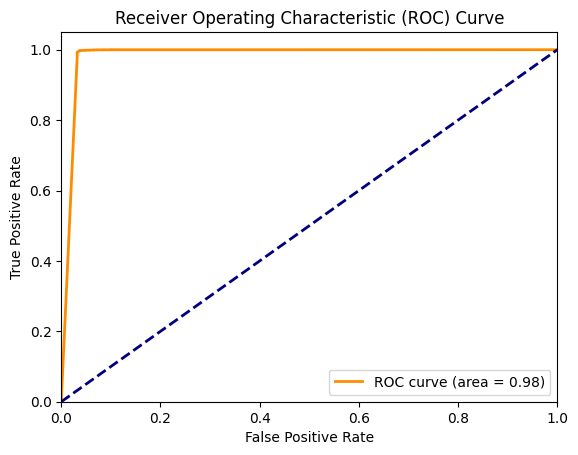

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Calculate precision score
precision = precision_score(y_test, y_pred, pos_label=0)

# Calculate recall score
recall = recall_score(y_test, y_pred, pos_label=0)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, pos_label=0)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_classifier.predict_proba(X_test)[:,1])

# Calculate AUC
auc_score = auc(fpr, tpr)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)
print("AUC Score:", auc_score)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb


# Create the XGBoost classifier
# Use 'binary:logistic' objective function for binary classification
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', seed=42)

# Define hyperparameters grid for grid search
# param_grid = {
#     # 'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7]
#     # 'learning_rate': [0.1, 0.01, 0.001],
#     # 'subsample': [0.7, 0.8, 0.9],
#     # 'colsample_bytree': [0.7, 0.8, 0.9]
# }

# # Perform grid search
# random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_grid, n_iter=10, cv=3, scoring='accuracy', random_state=42)
# random_search.fit(X_train, y_train)


# # Get the grid search results
# results_df = pd.DataFrame(random_search.cv_results_)

# # Plot mean test scores for each hyperparameter combination
# fig, ax = plt.subplots(figsize=(10, 6))

# for param in param_grid.keys():
#     param_results = results_df.groupby(param)['mean_test_score'].mean()
#     ax.plot(param_results.index, param_results.values, marker='o', label=param)

# ax.set_xlabel('Parameter Value')
# ax.set_ylabel('Mean Test Score')
# ax.set_title('Model Scores for Different Hyperparameters')
# ax.legend()
# plt.grid(True)
# plt.show()


# Get the best parameters found by grid search
# best_params = random_search.best_params_

# print(best_params)
best_params = {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}

# Train the classifier with the best parameters
best_xgb_classifier = xgb.XGBClassifier(**best_params)
best_xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.9989092441557798
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1402
           1       1.00      1.00      1.00     79276

    accuracy                           1.00     80678
   macro avg       0.98      0.98      0.98     80678
weighted avg       1.00      1.00      1.00     80678



In [ ]:
print(best_params)

{'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}


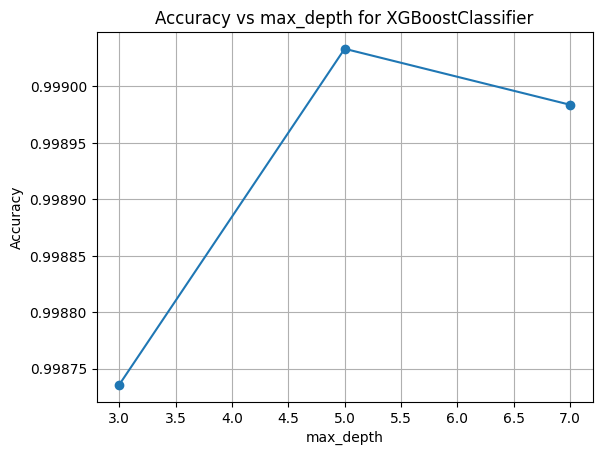

In [ ]:
# results_df
# n_estimators = [100, 200, 300]
max_depth = [3, 5, 7]
# List to store accuracies
accuracies = []

# Training and evaluating XGBoostClassifier for each value of n_estimators
for n in max_depth:
    # Initializing XGBoostClassifier with current value of n_estimators
    model = xgb.XGBClassifier(max_depth=n, objective='binary:logistic', seed=42)

    # Training the model
    model.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = model.predict(X_test)

    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Appending accuracy to the list
    accuracies.append(accuracy)

# Plotting accuracy vs n_estimators
plt.plot(max_depth, accuracies, marker='o')
plt.title('Accuracy vs max_depth for XGBoostClassifier')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

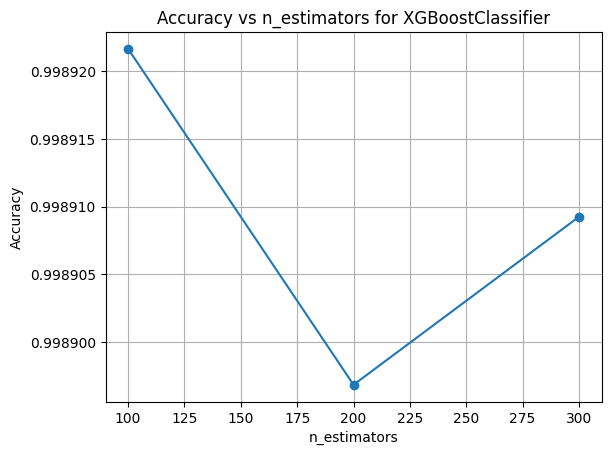

In [ ]:
n_estimators = [100, 200, 300]

# List to store accuracies
accuracies = []

# Training and evaluating XGBoostClassifier for each value of n_estimators
for n in n_estimators:
    # Initializing XGBoostClassifier with current value of n_estimators
    model = xgb.XGBClassifier(n_estimators=n, objective='binary:logistic', seed=42)

    # Training the model
    model.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = model.predict(X_test)

    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Appending accuracy to the list
    accuracies.append(accuracy)

# Plotting accuracy vs n_estimators
plt.plot(n_estimators, accuracies, marker='o')
plt.title('Accuracy vs n_estimators for XGBoostClassifier')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

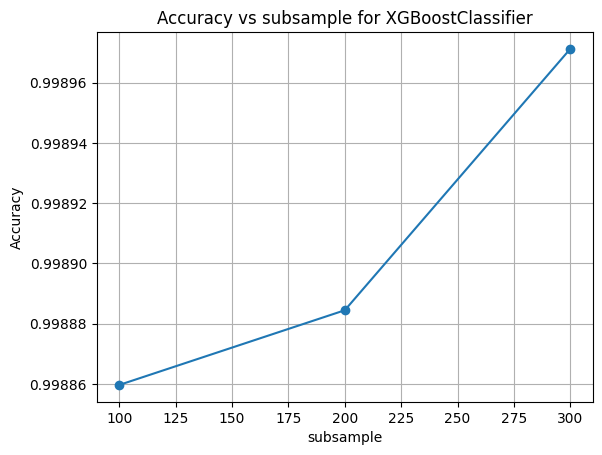

In [ ]:
subsample= [0.7, 0.8, 0.9]

# List to store accuracies
accuracies = []

# Training and evaluating XGBoostClassifier for each value of n_estimators
for n in subsample:
    # Initializing XGBoostClassifier with current value of n_estimators
    model = xgb.XGBClassifier(subsample=n, objective='binary:logistic', seed=42)

    # Training the model
    model.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = model.predict(X_test)

    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Appending accuracy to the list
    accuracies.append(accuracy)

# Plotting accuracy vs n_estimators
plt.plot(n_estimators, accuracies, marker='o')
plt.title('Accuracy vs subsample for XGBoostClassifier')
plt.xlabel('subsample')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Precision: 0.9686162624821684
Recall: 0.9686162624821684
F1 Score: 0.9686162624821684
Confusion Matrix:
 [[ 1358    44]
 [   44 79232]]
AUC Score: 0.9972849419198094


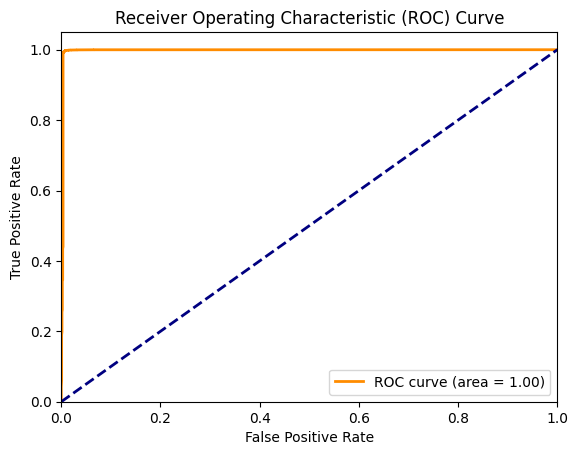

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Calculate precision score
precision = precision_score(y_test, y_pred, pos_label=0)

# Calculate recall score
recall = recall_score(y_test, y_pred, pos_label=0)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, pos_label=0)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, best_xgb_classifier.predict_proba(X_test)[:,1])

# Calculate AUC
auc_score = auc(fpr, tpr)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)
print("AUC Score:", auc_score)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Precision: [0.98262228 0.98263446 0.98264664 ... 1.         1.         1.        ]
Recall: [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 3.53196428e-03
 3.78424744e-05 0.00000000e+00]
F1 Score: 0.9686162624821684
Confusion Matrix:
 [[ 1358    44]
 [   44 79232]]
AUC Score: 0.9972849419198094


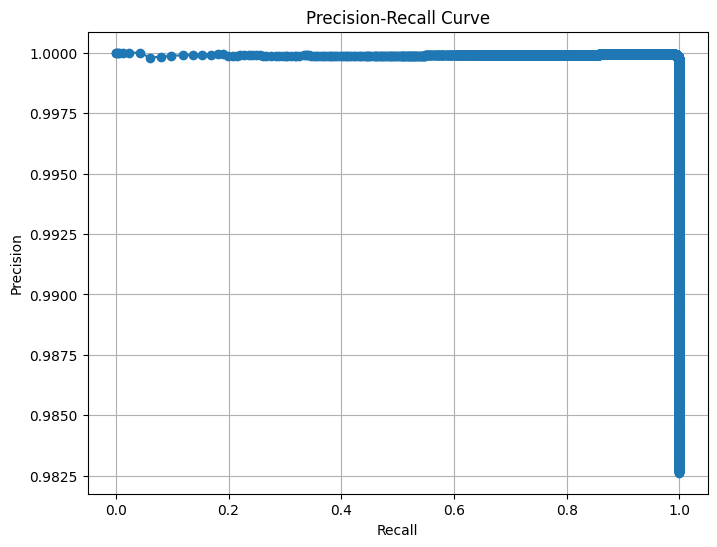

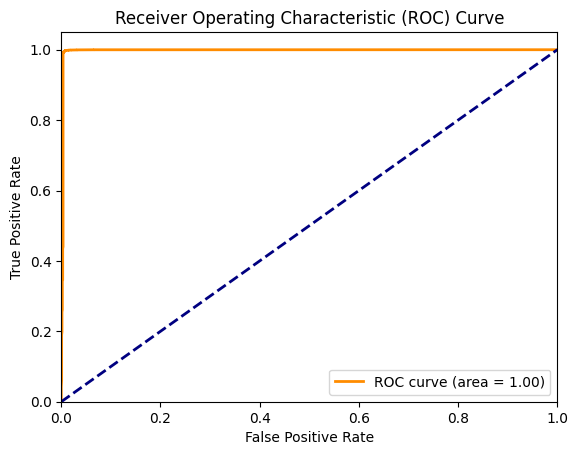

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision score
precision = precision_score(y_test, y_pred, pos_label=0)

# Calculate recall score
recall = recall_score(y_test, y_pred, pos_label=0)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, pos_label=0)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, best_xgb_classifier.predict_proba(X_test)[:,1])

# Calculate AUC
auc_score = auc(fpr, tpr)

y_proba = best_xgb_classifier.predict_proba(X_test)[:, 1]


# Generate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)
print("AUC Score:", auc_score)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)

# Evaluate Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, rf_y_pred))



Random Forest Classifier Accuracy: 0.9988472693919036
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1402
           1       1.00      1.00      1.00     79276

    accuracy                           1.00     80678
   macro avg       0.99      0.98      0.98     80678
weighted avg       1.00      1.00      1.00     80678



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Calculate precision score
precision = precision_score(y_test, rf_y_pred, pos_label=0)

# Calculate recall score
recall = recall_score(y_test, rf_y_pred, pos_label=0)

# Calculate F1 score
f1 = f1_score(y_test, rf_y_pred, pos_label=0)

# Calculate confusion matrix
cm = confusion_matrix(y_test, rf_y_pred)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:,1])

# Calculate AUC
auc_score = auc(fpr, tpr)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)
print("AUC Score:", auc_score)


Precision: 0.9718817591925017
Recall: 0.9614835948644793
F1 Score: 0.9666547149515955
Confusion Matrix:
 [[ 1348    54]
 [   39 79237]]
AUC Score: 0.997914759097651


In [ ]:
from sklearn.ensemble import IsolationForest

random_state = np.random.RandomState(42)
# Isolation Forest Classifier
if_classifier = IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)
if_classifier.fit(X_train, y_train)
if_y_pred = if_classifier.predict(X_test)

y_pred_binary = [0 if pred == -1 else 1 for pred in if_y_pred]
if_accuracy = accuracy_score(y_test, y_pred_binary)
print("\nIsolation Forest Classifier Accuracy:", if_accuracy)
print("Isolation Forest Classifier Classification Report:")
print(classification_report(y_test, y_pred_binary))


Isolation Forest Classifier Accuracy: 0.7473164927241627
Isolation Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.09      0.01      1402
           1       0.98      0.76      0.86     79276

    accuracy                           0.75     80678
   macro avg       0.49      0.43      0.43     80678
weighted avg       0.96      0.75      0.84     80678



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Calculate precision score
precision = precision_score(y_test, y_pred_binary, pos_label=0)

# Calculate recall score
recall = recall_score(y_test, y_pred_binary, pos_label=0)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_binary, pos_label=0)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# # Calculate ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:,1])

# # Calculate AUC
# auc_score = auc(fpr, tpr)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)
# print("AUC Score:", auc_score)


Precision: 0.00670408481446835
Recall: 0.0920114122681883
F1 Score: 0.012497577988761867
Confusion Matrix:
 [[  129  1273]
 [19113 60163]]
